In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Парето

Сгенерируем распределение Парето с параметрами *k*=8, $x_{m}$=10

In [178]:
b = 8
scale = 10
loc = 0

rv_pareto = sts.pareto(b=b, scale=scale, loc=loc)

Построим гистограмму и график функции плотности вероятности:

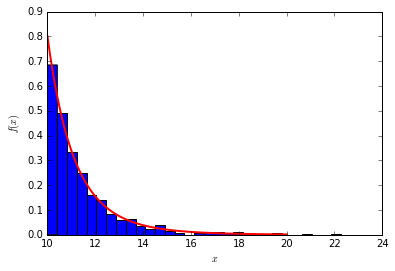

In [310]:
# выборка из 1000 значений
size = 1000
sample = rv_pareto.rvs(size)

# гистограмма
plt.hist(sample, bins=30, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

# график функции плотности вероятности
x = np.linspace(10, 20, 100)
pdf = rv_pareto.pdf(x)
plt.plot(x, pdf, linewidth=2.0, color='red')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Функции для расчета теоретических значений среднего и дисперсии распределения:

Среднее: $$E[X] = \frac{kx_m}{k-1}$$

In [180]:
# Среднее
def true_mean(b, scale):
    return float(b)*scale/(b-1)

Дисперсия: $$\left(\frac{x_m}{k-1}\right)^2\frac{k}{k-2}$$

In [181]:
# Дисперсия
def true_var(b, scale):
    return (float(scale)/(b-1))**2*(float(b)/(b-2))

Функция для построения гистограммы распределения среднего по выборке и плотность соответствующего нормального распределения 

In [299]:
def mean_estimation(n, distrib):
    mu = true_mean(b, scale)
    sigma = (true_var(b, scale)/float(n))**0.5
    print mu, sigma    
    
    # генерация выборочных средних
    samples = [distrib.rvs(n) for x in range(1, size + 1)]
    sample_mean = [np.mean(x) for x in samples]
    
    # нормальное распределения среднего
    norm_mean = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(10,15,100)
    pdf = norm_mean.pdf(x)

    # гистограмма и график
    plt.hist(sample_mean, bins=20, normed=True)
    plt.plot(x, pdf, color='red')
    plt.ylabel('$number of samples$')
    plt.xlabel('$x$')

## Гистограмма и график распределения среднего для n=5

11.4285714286 0.737711113563


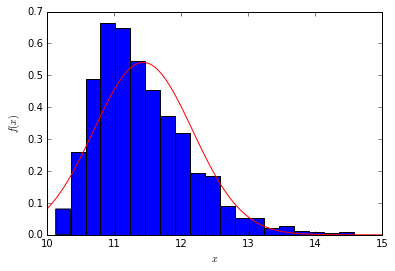

In [300]:
mean_estimation(5, rv_pareto)

## Гистограмма и график распределения среднего для n=10

11.4285714286 0.521640530957


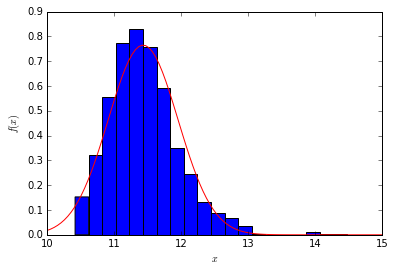

In [301]:
mean_estimation(10, rv_pareto)

## Гистограмма и график распределения среднего для n=50

11.4285714286 0.233284737408


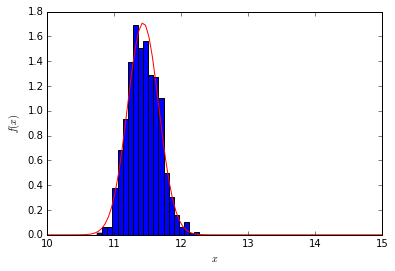

In [302]:
mean_estimation(50, rv_pareto)

## Гистограмма и график распределения среднего для n=100

11.4285714286 0.164957219768


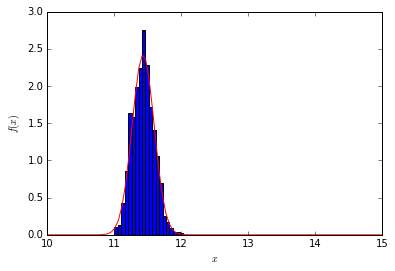

In [303]:
mean_estimation(100, rv_pareto)

Вывод: при увеличении n гистограмма распределения среднего более точно описывается нормальным распределением.